In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/MyDrive/CSE_518

/gdrive/MyDrive/CSE_518


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Aida Evaluation


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/CSE_518/aida_evaluation.csv')
df

,user_id,time_for_task_completion,widget_type,satisfaction
0,1,11.17,botfront,3
1,2,12.83,botfront,4
2,3,14.49,botfront,2
3,4,14.54,botfront,5
4,5,10.15,botfront,3
5,6,11.76,botfront,3
6,7,14.18,botfront,4
7,8,10.51,botfront,3
8,9,10.74,botfront,2
9,10,14.96,botfront,1


In [ ]:
df.loc[df.widget_type == 'my_own_widget',['time_for_task_completion','satisfaction']].describe()

,time_for_task_completion,satisfaction
count,10.000000,10.000000
mean,13.044000,2.600000
std,1.633083,1.173788
min,10.190000,1.000000
25%,11.852500,2.000000
50%,13.470000,2.500000
75%,13.850000,3.750000
max,15.580000,4.000000


In [ ]:
df.loc[df.widget_type == 'botfront',['time_for_task_completion','satisfaction']].describe()

,time_for_task_completion,satisfaction
count,10.000000,10.000000
mean,12.533000,3.000000
std,1.885336,1.154701
min,10.150000,1.000000
25%,10.847500,2.250000
50%,12.295000,3.000000
75%,14.412500,3.750000
max,14.960000,5.000000


In [ ]:
df[['time_for_task_completion','satisfaction']].describe()

,time_for_task_completion,satisfaction
count,20.000000,20.000000
mean,12.788500,2.800000
std,1.736582,1.151658
min,10.150000,1.000000
25%,11.410000,2.000000
50%,13.020000,3.000000
75%,14.257500,4.000000
max,15.580000,5.000000


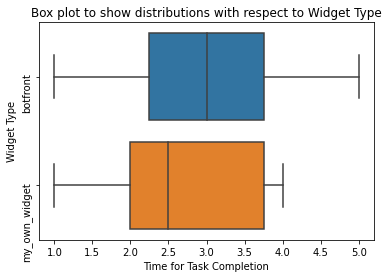

In [ ]:
sns.boxplot(x=df["satisfaction"], y=df['widget_type'])
plt.ylabel('Widget Type')
plt.xlabel('Time for Task Completion')
plt.yticks(rotation=90)
plt.title('Box plot to show distributions with respect to Widget Type')
plt.show()

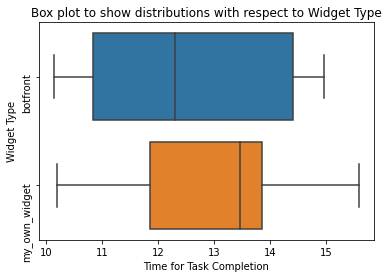

In [ ]:
sns.boxplot(x=df["time_for_task_completion"], y=df['widget_type'])
plt.ylabel('Widget Type')
plt.xlabel('Time for Task Completion')
plt.yticks(rotation=90)
plt.title('Box plot to show distributions with respect to Widget Type')
plt.show()

In [ ]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f50198f4650>,
      dtype=object)

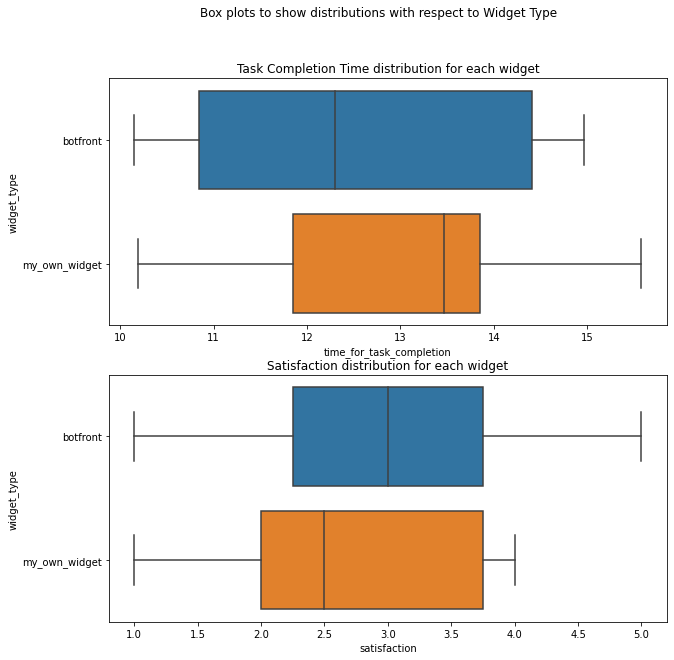

In [ ]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(10,10))
fig.suptitle('Box plots to show distributions with respect to Widget Type')
axes[0].set_title('Task Completion Time distribution for each widget')
axes[1].set_title('Satisfaction distribution for each widget')

sns.boxplot(ax=axes[0],x=df["time_for_task_completion"], y=df['widget_type'])
sns.boxplot(ax=axes[1],x=df["satisfaction"], y=df['widget_type'])




In [ ]:
df1 = df.groupby('widget_type')['time_for_task_completion','satisfaction'].mean()
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,time_for_task_completion,satisfaction
widget_type,,
botfront,12.533,3.0
my_own_widget,13.044,2.6


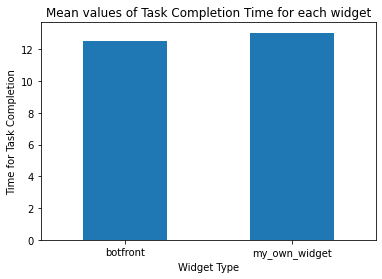

In [ ]:
df1['time_for_task_completion'].plot(kind = 'bar')
plt.xlabel('Widget Type')
plt.xticks(rotation=0)
plt.ylabel('Time for Task Completion')
plt.title('Mean values of Task Completion Time for each widget')
plt.show()

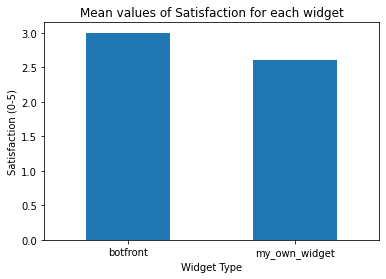

In [ ]:
df1['satisfaction'].plot(kind = 'bar')
plt.xlabel('Widget Type')
plt.ylabel('Satisfaction (0-5)')
plt.xticks(rotation=0)
plt.title('Mean values of Satisfaction for each widget')
plt.show()

In [ ]:
import scipy.stats as stats

stats.f_oneway(df['satisfaction'][df['widget_type'] == 'my_own_widget'],
               df['satisfaction'][df['widget_type'] == 'botfront'],)

F_onewayResult(statistic=0.5901639344262296, pvalue=0.45231731932799546)